In [45]:
from tensorflow.keras.models import load_model
new_model = load_model('railway_model.h5')

In [46]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 524288)           

In [47]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

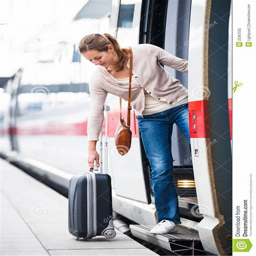

In [49]:
IMAGE_SHAPE = (256, 256)
Fall_test = Image.open("t15.jpeg").resize(IMAGE_SHAPE)
Fall_test

In [50]:
Fall_test = np.array(Fall_test)/255.0
Fall_test.shape

(256, 256, 3)

In [51]:
Fall_test[np.newaxis, ...]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99215686, 0.99215686, 0.99215686],
         ...,
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99215686, 0.99215686, 0.99215686],
         ...,
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.84313725, 0.83921569, 0.8627451 ],
         [0.82745098, 0.82352941, 0.84705882]

In [52]:
result = new_model.predict(Fall_test[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 532ms/step


(1, 3)

In [53]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [54]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [55]:
classes = ['fall','not_fall','risky']

In [8]:
import cv2
cap=cv2.VideoCapture(0)

cap.set(3,640)
cap.set(4,480)
cap.set(10,100)

False

In [9]:
while True:
    success, img=cap.read()
    frame=img
    img = cv2.resize(img, (256,256))
    img = img.astype("float") / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # apply gender detection on face
    conf = new_model.predict(img)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)
 
    # write label and confidence above face rectangle
    cv2.putText(frame, label, (300,200), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)

    
    cv2.imshow("fall detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# release resources
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


NameError: name 'webcam' is not defined

In [1]:
#pip install requests

In [2]:
pip install imutils

In [11]:
import requests
import cv2
import numpy as np
import imutils

In [13]:
url = "http://10.43.251.166:8080/shot.jpg"

while True:
    img_resp = requests.get(url)
    img_arr = np.array(bytearray(img_resp.content),dtype=np.uint8)
    img = cv2.imdecode(img_arr, -1)
    img = imutils.resize(img, width=1000, height=1800)
    frame=img
    
    img = cv2.resize(img, (256,256))
    img = img.astype("float") / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # apply fall detection 
    conf = new_model.predict(img)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)
 
    # write label and confidence above face rectangle
    cv2.putText(frame, label, (300,200), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)

    
    cv2.imshow("Camera Feed",frame)
    #press Esc key to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 52ms/step
